In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
#это фаил с отдельной обработкой test.csv я посчитал если обработать их отдельно точность будет немножко выше
df_test = pd.read_csv('test.csv')
df_test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [106]:
df_test.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

2) Препроцессинг тестовой части. Пройтись по столбам и поменять данные по схожему алгоритм, как это было в предыдущем фаиле


In [107]:
df_test['Rooms'].value_counts()
#Заметны незначительные выбросы. Основной интерес падает к значениям где 0 комнат

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
0.0        2
17.0       1
Name: Rooms, dtype: int64

In [108]:
df_test['Rooms'].replace(0, 2, inplace=True) #самое популярное значение
df_test['Rooms'].value_counts()

2.0     2032
1.0     1769
3.0     1099
4.0       90
5.0        7
6.0        2
17.0       1
Name: Rooms, dtype: int64

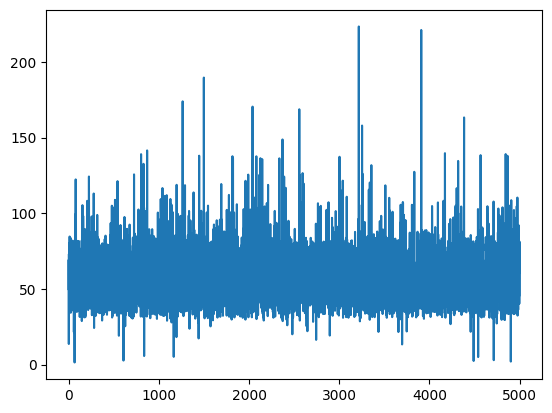

In [109]:
plt.plot(df_test['Square'])

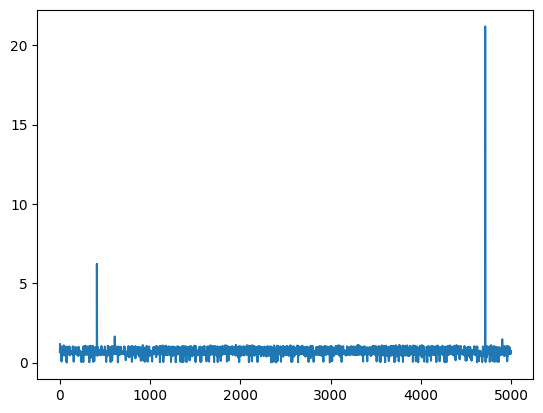

In [110]:
#Посмотрим их соотношение
lifestrain_notna = df_test[df_test['LifeSquare'].notna()]
div_squares = lifestrain_notna ['LifeSquare']/lifestrain_notna ['Square']
plt.plot(div_squares)
#есть аномалии

In [111]:
errors = df_test[df_test.index.isin(div_squares[div_squares>1.1].index)].copy()
errors

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
410,11533,94,2.0,48.713443,303.071094,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,NaN,0,0,B
608,16401,30,1.0,2.645046,4.338755,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
1950,7031,6,1.0,37.239722,41.385676,0.0,16,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
3309,8516,6,1.0,38.278453,42.655813,1.0,18,17.0,2016,0.243205,B,B,5,1564,0,540.0,0,0,B
3762,6000,23,1.0,31.308243,34.855604,1.0,2,17.0,2017,0.034656,B,B,0,168,0,NaN,0,0,B
4713,170,6,2.0,2.900586,61.468563,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1.0,1.975769,2.900371,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [112]:
df_test.loc[errors.index, 'Square'] = errors['LifeSquare']
df_test.loc[errors.index, 'LifeSquare'] = errors['Square']
df_test[df_test.index.isin(div_squares[div_squares>1.1].index)]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
2,5480,190,1.0,15.948246,13.597819,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
410,11533,94,2.0,303.071094,48.713443,6.0,5,12.0,1974,0.521867,B,B,25,6149,0,NaN,0,0,B
608,16401,30,1.0,4.338755,2.645046,1.0,2,1.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B
1950,7031,6,1.0,41.385676,37.239722,0.0,16,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B
3309,8516,6,1.0,42.655813,38.278453,1.0,18,17.0,2016,0.243205,B,B,5,1564,0,540.0,0,0,B
3762,6000,23,1.0,34.855604,31.308243,1.0,2,17.0,2017,0.034656,B,B,0,168,0,NaN,0,0,B
4713,170,6,2.0,61.468563,2.900586,1.0,18,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B
4902,1420,45,1.0,2.900371,1.975769,1.0,1,1.0,1977,0.195781,B,B,23,5212,6,NaN,3,2,B


In [113]:

df_test['KitchenSquare'].sort_values(ascending=False)
#Есть выделяющиес значение


1964    620.0
1777    112.0
4555     97.0
1456     65.0
4281     62.0
        ...  
2519      0.0
1767      0.0
919       0.0
3993      0.0
3777      0.0
Name: KitchenSquare, Length: 5000, dtype: float64

In [114]:
df_test.loc[1964, :]
#значение весьма выписывается из картины, предлагаю заменить разностью площади и жилой площади

Id                   14594
DistrictId              11
Rooms                  2.0
Square           42.795304
LifeSquare        24.22377
KitchenSquare        620.0
Floor                   11
HouseFloor            14.0
HouseYear             1972
Ecology_1         0.038693
Ecology_2                B
Ecology_3                B
Social_1                28
Social_2              6533
Social_3                 1
Healthcare_1        1015.0
Helthcare_2              2
Shops_1                  5
Shops_2                  B
Name: 1964, dtype: object

In [115]:
df_test.loc[1964, 'KitchenSquare'] = df_test.loc[1964, 'Square']-df_test.loc[1964, 'LifeSquare']
df_test.loc[1964, :]

Id                   14594
DistrictId              11
Rooms                  2.0
Square           42.795304
LifeSquare        24.22377
KitchenSquare    18.571534
Floor                   11
HouseFloor            14.0
HouseYear             1972
Ecology_1         0.038693
Ecology_2                B
Ecology_3                B
Social_1                28
Social_2              6533
Social_3                 1
Healthcare_1        1015.0
Helthcare_2              2
Shops_1                  5
Shops_2                  B
Name: 1964, dtype: object

In [116]:
df_test['Floor'].sort_values(ascending=False)
#Выглядит рационально

4698    78
3711    46
1587    38
4764    34
3585    33
        ..
2898     1
4850     1
2146     1
2958     1
2694     1
Name: Floor, Length: 5000, dtype: int64

In [117]:
df_test['HouseFloor'].sort_values(ascending=False)

651     99.0
1587    48.0
3909    48.0
3711    48.0
1438    40.0
        ... 
3507     0.0
1912     0.0
4840     0.0
78       0.0
4856     0.0
Name: HouseFloor, Length: 5000, dtype: float64

In [118]:
#Установим среднее соотношение, его и используем
no_floor = df_test[df_test['HouseFloor']==0]
df_floor = df_test[df_test['HouseFloor']>=1]
div = (df_floor['Floor']/df_floor['HouseFloor']).mean()
df_test.loc[no_floor.index, 'HouseFloor']=round(no_floor["Floor"]/div)
div
#в первой части средняя разница была около 1.3

1.0801167501065043

In [119]:
year = df_test['HouseYear'].sort_values(ascending=False)
year
#все нормально

385     2020
888     2020
4273    2020
1275    2020
3382    2020
        ... 
1475    1912
64      1911
2691    1910
2       1909
3253    1908
Name: HouseYear, Length: 5000, dtype: int64

In [120]:
#Необходимо дать категориальный тип соответствующим столбам
df_test['Ecology_2']=df_test['Ecology_2'].astype('category')
df_test['Ecology_3']=df_test['Ecology_3'].astype('category')
df_test['Shops_2']=df_test['Shops_2'].astype('category')

df_test['Ecology_2'] = df_test['Ecology_2'].apply(lambda x : 0 if x == 'A' else 1)
df_test['Ecology_3'] = df_test['Ecology_3'].apply(lambda x : 0 if x == 'A' else 1)
df_test['Shops_2'] = df_test['Shops_2'].apply(lambda x : 0 if x == 'A' else 1)


In [121]:

for i in df_test['DistrictId'].unique():  
    target = df_test[df_test['DistrictId']==i]['Healthcare_1']
    a = target.value_counts().index
    if len(a)>0:
        df_test.loc[target.index, 'Healthcare_1'] = target.fillna(a[0])
    else:
        df_test.loc[target.index, 'Healthcare_1']  = target.fillna(df_test['Healthcare_1'].mean())

df_test['Healthcare_1'].isna().sum()

0

In [122]:
def weight_columns(df, y, put_model, rs=42):
    """
    df - датафрейм(первоначальный x)
    y - столбец который нужно предсказывать
    rs - random_state
    put_model - используемая модель

    Функция переберает столбцы таким образом чтобы вернуть те,
    при исопльзовании которых будет наивысший результат r2_score.
    Это будет означать что вот эти столбцы имеют действительное
    влияние на формирование предсказуемого столба, в рамках данной
    модели конечно.
    """
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score

    df_columns = list(df.columns)
    df_0 = list(df.columns[:2])

    x = df.loc[:, df_0]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rs)
    model = put_model()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)

    power_columns = []+df_0
    for i in df.columns[2:]:
        c_power_columns = power_columns.copy()
        c_power_columns.append(i)
        x = df.loc[:, c_power_columns]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rs)
        model = put_model()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2_new = r2_score(y_test, y_pred)

        if r2_new>r2:
            print(i, r2_new, "+")
            r2=r2_new
            power_columns.append(i)
        else:
            print(i, r2_new, "-")

    for i in df_0:
        c_power_columns = power_columns.copy()
        c_power_columns.remove(i)
        x = df.loc[:, c_power_columns]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=rs)
        model = put_model()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2_new = r2_score(y_test, y_pred)

        print(i, r2_new)
        if r2_new>r2:
            print(i, r2_new, "+")
            r2=r2_new
            power_columns.remove(i)
        else:
            print(i, r2_new, "-")

    return [power_columns, r2]

In [123]:
from sklearn.linear_model import LinearRegression
x_0 = df_test_L.drop(columns=['LifeSquare', 'Id'])
y = df_test_L['LifeSquare']
res = weight_columns(x_0, y, LinearRegression)

Square 0.48770875866072516 +
KitchenSquare 0.5010496313558077 +
Floor 0.4998416164667324 -
HouseFloor 0.5011335758223037 +
HouseYear 0.4979329475861378 -
Ecology_1 0.500668267266748 -
Ecology_2 0.5010736656825988 -
Ecology_3 0.5011434518860862 +
Social_1 0.4985872821826691 -
Social_2 0.49948046605576446 -
Social_3 0.500212644478702 -
Healthcare_1 0.5009952999759798 -
Helthcare_2 0.5010888949299506 -
Shops_1 0.5006717597633075 -
Shops_2 0.4989762201661333 -
DistrictId 0.49752074942552527
DistrictId 0.49752074942552527 -
Rooms 0.49839130418638367
Rooms 0.49839130418638367 -


In [124]:
#Предскажем значения LifeSquare
model = LinearRegression()
df_test_L_train = df_test[df_test['LifeSquare'].notna()]
x = df_test_L_train.drop(columns=['LifeSquare'])
x = df_test_L_train.loc[:, res[0]]
y = df_test_L_train['LifeSquare']
model.fit(x, y)

df_test_L_pred = df_test[df_test['LifeSquare'].isna()]
x_val = df_test_L_pred.drop(columns=['LifeSquare'])
x_val = df_test_L_pred.loc[:, res[0]]
y_pred = model.predict(x_val)

indexes = df_test[df_test['LifeSquare'].isna()].index
df_test['LifeSquare'].fillna(pd.Series(y_pred, index=indexes), inplace=True)

print(f"если test_size=0.25 то r2_score={res[1]}")

если test_size=0.25 то r2_score=0.5011434518860862


In [125]:
df_test.to_csv('test_pre_1.сsv', sep=',', encoding='utf')